In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

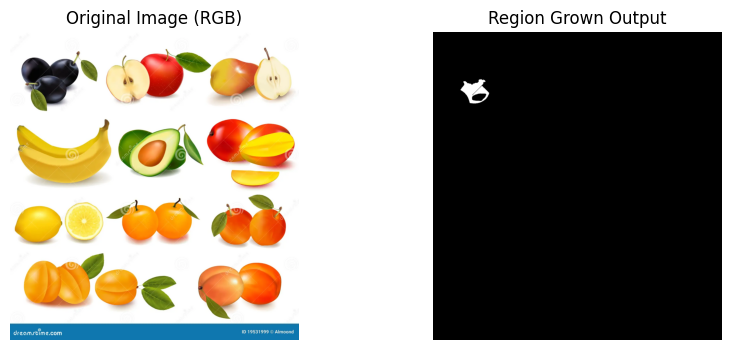

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv.imread('/content/fruits img.webp')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Seed point (INSIDE fruit)
seed = (300, 200)
threshold = 25

# Initialize mask
h, w = gray.shape
segmented = np.zeros((h, w), np.uint8)
segmented[seed] = 255

# Region growing
pixel_value = gray[seed]
stack = [seed]

while stack:
    y, x = stack.pop()
    for dy, dx in [(-1,0),(1,0),(0,-1),(0,1)]:
        ny, nx = y + dy, x + dx
        if 0 <= ny < h and 0 <= nx < w:
            if segmented[ny, nx] == 0:
                if abs(int(gray[ny, nx]) - int(pixel_value)) < threshold:
                    segmented[ny, nx] = 255
                    stack.append((ny, nx))

# Display
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image (RGB)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented, cmap='gray')
plt.title("Region Grown Output")
plt.axis('off')

plt.show()


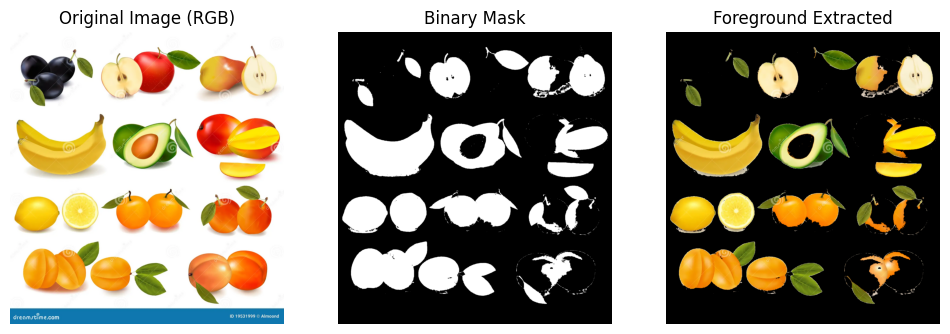

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image (BGR)
image = cv.imread('/content/fruits img.webp') # Changed image path to an existing file

# Convert BGR -> RGB for display
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Convert BGR -> HSV for processing
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Define HSV range (example: GREEN object)
lower_hsv = np.array([15, 30, 20])
upper_hsv = np.array([85, 255, 255])

# Create binary mask
mask = cv.inRange(hsv, lower_hsv, upper_hsv)

# Extract foreground
segmented = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

# Display results
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title("Original Image (RGB)")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(mask, cmap='gray')
plt.title("Binary Mask")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(segmented)
plt.title("Foreground Extracted")
plt.axis('off')

plt.show()